### Max-Cut Problem
The Maximum Cut problem involves partitioning the nodes of a graph into two disjoint subsets such that the sum of the weights of the edges between the two subsets is maximized. This problem is NP-hard, meaning that finding the optimal solution is computationally challenging, especially for large graphs. In this notebook, we explore three approaches to solve the Maximum Cut problem:

1. Brute Force: The brute force method generates all possible combinations of node partitions and evaluates the cut for each combination. This approach is guaranteed to find the maximum cut but is computationally expensive, as the number of possible partitions grows exponentially with the number of nodes in the graph.

2. QAOA: The algorithm uses a quantum circuit to explore possible solutions in a superposition of states, with the goal of finding a cut that is close to the maximum. We will simulate QAOA on a quantum simulator and optimize over the quantum circuit parameters to approximate the maximum cut.

3. Randomized Approach: In this approach, we use randomization to generate random cuts and evaluate their quality. By running the algorithm multiple times, we aim to find a cut that is close to the maximum, without exhaustively searching all possibilities. This method is efficient and can often provide a good solution in a reasonable amount of time, but it does not guarantee finding the optimal solution.

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import random
import cirq

In [75]:
def visualize_graph(graph, node_colors, layout):
    '''
    This function is used to set up the drawing canvas, draw the graph nodes and edges, and then retrive and draw edge weights as labels.
    '''
    canvas = plt.axes(frameon=True)
    nx.draw_networkx(graph, node_color=node_colors, node_size=800, alpha=0.8, ax=canvas, pos=layout)
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos=layout, edge_labels=edge_weights)

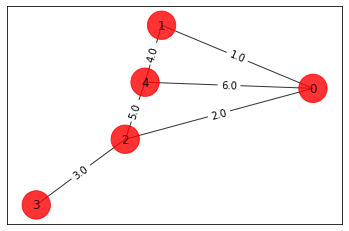

In [76]:
'''
Here, we initialize our graph with 5 nodes, and then define their weights and edges. We then set nodes and layout positions. Finally let us visualize our graph that we will be working on.
'''

num_nodes = 5
graph = nx.Graph()
graph.add_nodes_from(range(num_nodes))

edge_list = [(0, 1, 1.0), (0, 2, 2.0), (0, 4, 6.0), (1, 4, 4.0), (4, 2, 5.0), (2, 3, 3.0)]

graph.add_weighted_edges_from(edge_list)

node_colors = ['r' for _ in graph.nodes()]
layout_positions = nx.spring_layout(graph)

visualize_graph(graph, node_colors, layout_positions)


In [77]:
''' 
Let us calculate the weight matrix for the graph. 
The weight matrix is a 2D array where the entry at (i, j) represents the weight of the edge between nodes i and j. 
If no edge exists, the value remains zero.
'''
weights = np.zeros((num_nodes, num_nodes)) 
for source in range(num_nodes):
    for target in range(num_nodes):
        edge_data = graph.get_edge_data(source, target, default=None)
        if edge_data:
            weights[source, target] = edge_data['weight']

Partition = [0, 0, 0, 0, 0], Cut Value = 0.0
Partition = [1, 0, 0, 0, 0], Cut Value = 9.0
Partition = [0, 1, 0, 0, 0], Cut Value = 5.0
Partition = [1, 1, 0, 0, 0], Cut Value = 12.0
Partition = [0, 0, 1, 0, 0], Cut Value = 10.0
Partition = [1, 0, 1, 0, 0], Cut Value = 15.0
Partition = [0, 1, 1, 0, 0], Cut Value = 15.0
Partition = [1, 1, 1, 0, 0], Cut Value = 18.0
Partition = [0, 0, 0, 1, 0], Cut Value = 3.0
Partition = [1, 0, 0, 1, 0], Cut Value = 12.0
Partition = [0, 1, 0, 1, 0], Cut Value = 8.0
Partition = [1, 1, 0, 1, 0], Cut Value = 15.0
Partition = [0, 0, 1, 1, 0], Cut Value = 7.0
Partition = [1, 0, 1, 1, 0], Cut Value = 12.0
Partition = [0, 1, 1, 1, 0], Cut Value = 12.0
Partition = [1, 1, 1, 1, 0], Cut Value = 15.0
Partition = [0, 0, 0, 0, 1], Cut Value = 15.0
Partition = [1, 0, 0, 0, 1], Cut Value = 12.0
Partition = [0, 1, 0, 0, 1], Cut Value = 12.0
Partition = [1, 1, 0, 0, 1], Cut Value = 7.0
Partition = [0, 0, 1, 0, 1], Cut Value = 15.0
Partition = [1, 0, 1, 0, 1], Cut Value = 

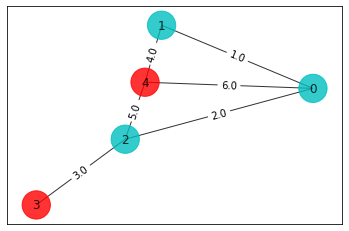

In [78]:
'''
This code implements a brute-force algorithm to find the maximum cut in a graph. 
A maximum cut divides the graph's nodes into two disjoint sets such that the sum of edge weights between the sets is maximized. 
The algorithm evaluates all possible configurations of node assignments (2^n combinations for n nodes) using bit strings. 
It calculates the cut value for each configuration, keeps track of the best solution, and then visualizes the graph with nodes 
colored according to the optimal cut.
'''
best_cut_value = 0
optimal_partition = 0

for binary_string in range(2**num_nodes):
    partition = [int(bit) for bit in reversed(list(bin(binary_string)[2:].zfill(num_nodes)))]
    
    cut_value = 0
    for u in range(num_nodes):
        for v in range(num_nodes):
            cut_value += weights[u, v] * partition[u] * (1 - partition[v])
    
    if best_cut_value < cut_value:
        best_cut_value = cut_value
        optimal_partition = partition
    
    print('Partition = ' + str(partition) + ', Cut Value = ' + str(cut_value))

node_colors = ['r' if optimal_partition[i] == 0 else 'c' for i in range(num_nodes)]
visualize_graph(graph, node_colors, layout_positions)

print('\nOptimal Partition = ' + str(optimal_partition) + ', Maximum Cut Value = ' + str(best_cut_value))


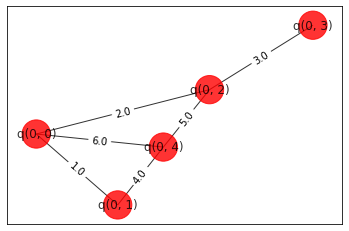

In [79]:
'''
This code creates a graph using the `networkx` library to represent a set of quantum bits (qubits) as nodes. 
Each qubit is connected by weighted edges, and the graph is visualized using `matplotlib` via a spring layout. 
The nodes (qubits) are colored red for visual clarity in the output.
'''

num_nodes = 5 

qubits = [cirq.GridQubit(0, i) for i in range(0, num_nodes)]

graph = nx.Graph()
graph.add_nodes_from(qubits)
edges = [
    (qubits[0], qubits[1], 1.0),
    (qubits[0], qubits[2], 2.0),
    (qubits[0], qubits[4], 6.0),
    (qubits[1], qubits[4], 4.0),
    (qubits[4], qubits[2], 5.0),
    (qubits[3], qubits[2], 3.0)
]

graph.add_weighted_edges_from(edges)

colors = ['r' for node in graph.nodes()]
pos = nx.spring_layout(graph)
visualize_graph(graph, colors, pos)


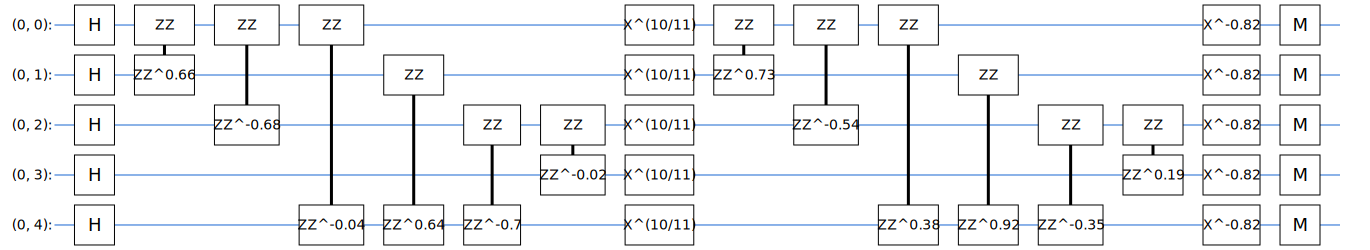

In [80]:
'''
This code constructs a quantum circuit for solving combinatorial optimization problems using the Quantum Approximate Optimization Algorithm (QAOA).
The circuit applies a series of parameterized quantum gates to qubits representing the problem variables.
The goal is to prepare a superposition of qubit states and apply a combination of cost and mixer unitaries to iteratively improve the solution.
Finally, measurements are taken on the qubits to obtain the solution to the optimization problem.
'''

from cirq.contrib.svg import SVGCircuit

num_qubits = 5 
depth = 2  
num_repetitions = 10_000 

def create_qaoa_circuit(params):
    '''
    This function creates a QAOA circuit with parameterized gates for the given number of qubits.
    The circuit consists of layers of cost and mixer unitaries, followed by measurements.
    '''
    depth = len(params) // 2
    alphas = params[:depth]
    betas = params[depth:]

    qaoa_circuit = cirq.Circuit(cirq.H.on_each(graph.nodes()))

    for i in range(depth):
        for u, v, w in graph.edges(data=True):
            qaoa_circuit.append(cirq.ZZ(u, v) ** (alphas[i] * w['weight']))
        qaoa_circuit.append(cirq.Moment(cirq.X(qubit) ** betas[i] for qubit in graph.nodes()))

    for qubit in graph.nodes():
        qaoa_circuit.append(cirq.measure(qubit))

    return qaoa_circuit

qaoa_circuit = create_qaoa_circuit(params=[float(random.randint(-314, 314)) / 100 for i in range(0, depth * 2)])
SVGCircuit(qaoa_circuit)

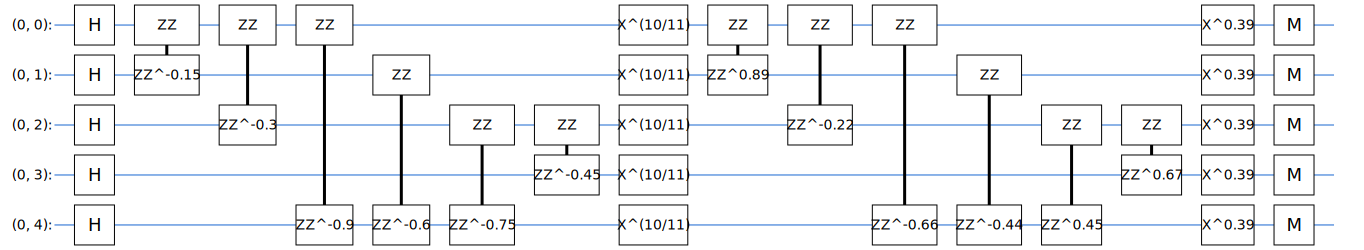

In [81]:
def create_qaoa_circuit(params):
    '''
    This function creates a QAOA circuit with parameterized gates for the given number of qubits.
    The circuit consists of layers of cost and mixer unitaries, followed by measurements.
    '''
    depth = len(params) // 2
    alphas = params[:depth]
    betas = params[depth:]

    qaoa_circuit = cirq.Circuit(cirq.H.on_each(graph.nodes()))

    for i in range(depth):
        for u, v, w in graph.edges(data=True):
            qaoa_circuit.append(cirq.ZZ(u, v) ** (alphas[i] * w['weight']))
        qaoa_circuit.append(cirq.Moment(cirq.X(qubit) ** betas[i] for qubit in graph.nodes()))

    for qubit in graph.nodes():
        qaoa_circuit.append(cirq.measure(qubit))

    return qaoa_circuit

qaoa_circuit = create_qaoa_circuit(params=[float(random.randint(-314, 314)) / 100 for i in range(0, depth * 2)])
SVGCircuit(qaoa_circuit)

In [82]:
'''
This function computes the estimated cost associated with a set of computational bitstrings on a given graph,
which represents a combinatorial optimization problem. The function evaluates the cost of the QAOA by iterating
over the edges of the graph and calculating the contribution of each pair of connected nodes based on their bitstring samples.
The total cost is the weighted sum of these contributions, and the result is returned as the negative of the computed value.
'''

def estimate_cost(graph, samples):
    total_cost = 0.0

    for u, v, w in graph.edges(data=True):
        u_samples = samples[str(u)]
        v_samples = samples[str(v)]

        u_signs = (-1) ** u_samples
        v_signs = (-1) ** v_samples
        edge_signs = u_signs * v_signs

        edge_cost = np.mean(edge_signs) * w['weight']
        total_cost += edge_cost

    return -total_cost


In [83]:
'''
This code executes a quantum circuit simulation using specified values for the QAOA parameters, alpha and beta.
The circuit is run multiple times, and the results are sampled. The estimated cost for the optimization problem
is then calculated using the previously defined `estimate_cost` function.
'''

alpha_value = np.pi / 4
beta_value = np.pi / 2
simulator = cirq.Simulator()

sampled_results = simulator.sample(
    qaoa_circuit, 
    params={alpha: alpha_value, beta: beta_value}, 
    repetitions=20_000
)

print(f'Alpha = {round(alpha_value, 3)} Beta = {round(beta_value, 3)}')
print(f'Estimated cost: {estimate_cost(graph, sampled_results)}')


Alpha = 0.785 Beta = 1.571
Estimated cost: -5.5211


In [84]:
'''
This code samples a QAOA circuit for a range of values of the parameters alpha and beta, 
computes the corresponding cost values, and stores both the cost and parameter values
in two separate arrays. The grid is defined over the interval [0, 2π) for both parameters.
'''

grid_points = 5

cost_matrix = np.empty((grid_points, grid_points))
param_matrix = np.empty((grid_points, grid_points, 2))

for i, angle_1 in enumerate(np.linspace(0, 2 * np.pi, grid_points)):
  for j, angle_2 in enumerate(np.linspace(0, 2 * np.pi, grid_points)):
    measurement_results = simulator.sample(
        quantum_circuit,
        params={alpha: angle_1, beta: angle_2},
        repetitions=20000
    )
    cost_matrix[i][j] = estimate_cost(graph, measurement_results)
    param_matrix[i][j] = angle_1, angle_2


In [85]:
'''
This function visualizes and outputs the information for a graph cut. 
It assigns colors to nodes based on their membership in the partition, 
computes the cut size, and displays the graph with edge weights.
'''

def display_cut(cut_partition):
    node_colors = []
    for node in graph:
        if node in cut_partition:
            node_colors.append('blue')
        else:
            node_colors.append('red')

    edge_list = graph.edges(data=True)
    edge_weights = [weight['weight'] for (_, _, weight) in edge_list]

    nx.draw_circular(
        graph,
        node_color=node_colors,
        node_size=1000,
        with_labels=True,
        width=edge_weights)
    plt.show()
    
    cut_size_value = nx.cut_size(graph, cut_partition, weight='weight')
    print(f'Cut size: {cut_size_value}')


In [86]:
'''
This block identifies the optimal set of control parameters by finding the index of the maximum value 
in the cost matrix, retrieves the corresponding parameters, and outputs them.
'''

optimal_index = np.unravel_index(np.argmax(cost_matrix), cost_matrix.shape)
optimal_params = param_matrix[optimal_index]
print(f'Optimal control parameters: {optimal_params}')


Optimal control parameters: [3.14159265 6.28318531]


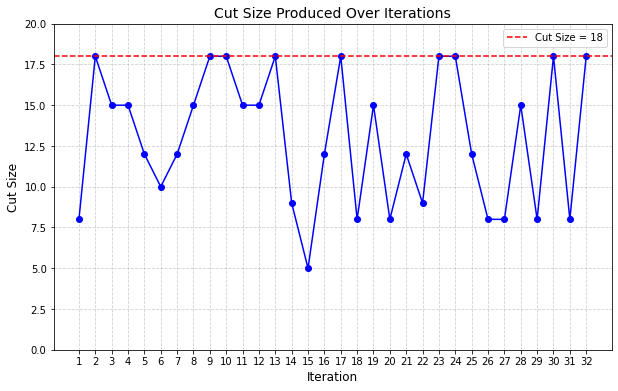

In [87]:
'''
This block samples candidate cuts from the QAOA circuit, 
evaluates the cut sizes for each candidate, and updates 
the best partitions and cut size if a better cut is found.
'''

cut_samples = simulator.sample(
    quantum_circuit,
    params={alpha: optimal_params[0], beta: optimal_params[1]},
    repetitions=100
)

best_cut_S = set()
best_cut_T = set()
best_cut_value = -np.inf

cut_sizes_qaoa = []
for i in range(1, 33):
  sample = cut_samples.iloc[i]
  one_qubits = set(sample[sample == 1].index)
  cut_S = set()
  cut_T = set()

  for node in graph:
    if str(node) in one_qubits:
      cut_S.add(node)
    else:
      cut_T.add(node)

  current_cut_size = nx.cut_size(
      graph, cut_S, cut_T, weight='weight')

  if current_cut_size > best_cut_value:
    best_cut_value = current_cut_size
    best_cut_S = cut_S
    best_cut_T = cut_T

  cut_sizes_qaoa.append(current_cut_size)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 33), cut_sizes_qaoa, marker='o', linestyle='-', color='b')
plt.title('Cut Size Produced Over Iterations', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cut Size', fontsize=12)
plt.xticks(range(1, 33))
plt.ylim(0, 20)  
plt.axhline(18, color='red', linestyle='--', label='Cut Size = 18')  
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


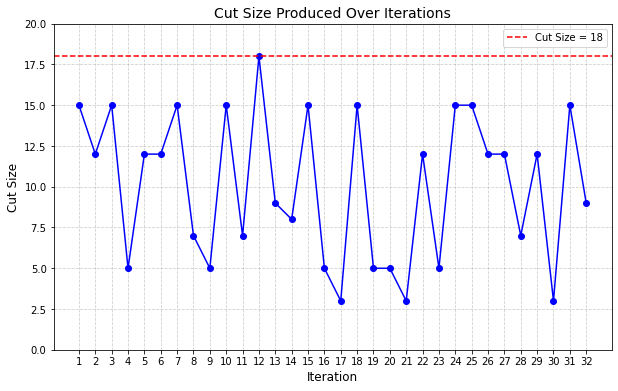

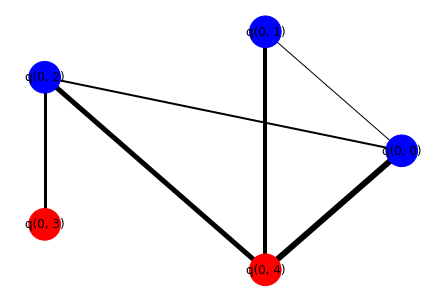

Cut size: 18.0


In [88]:
'''
This block randomly generates candidate cuts, calculates the cut size for each, 
and updates the best cut partitions and size if a better one is found.
'''

random_cut_S = set()
random_cut_T = set()
best_random_cut_value = -9999
cut_sizes = []
for i in range(1, 33):
    cut_S = set()
    cut_T = set()

    for node in graph:
        if random.random() > 0.5:
            cut_S.add(node)
        else:
            cut_T.add(node)

    current_cut_size = nx.cut_size(graph, cut_S, cut_T, weight='weight')

    if current_cut_size > best_random_cut_value:
        best_random_cut_value = current_cut_size
        random_cut_S = cut_S
        random_cut_T = cut_T

    cut_sizes.append(current_cut_size)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 33), cut_sizes, marker='o', linestyle='-', color='b')
plt.title('Cut Size Produced Over Iterations', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cut Size', fontsize=12)
plt.xticks(range(1, 33))
plt.ylim(0, 20)  
plt.axhline(18, color='red', linestyle='--', label='Cut Size = 18')  
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

display_cut(random_cut_S)

-----QAOA Cut-----


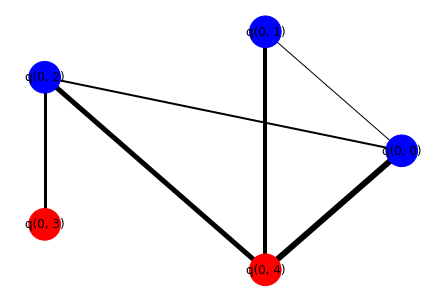

Cut size: 18.0


-----Random Cut-----


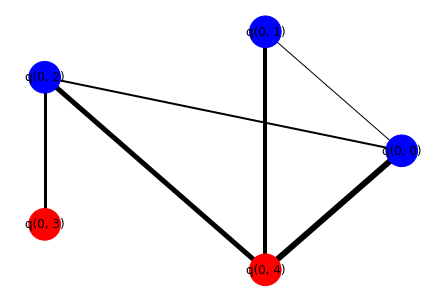

Cut size: 18.0


In [89]:
'''
This block prints and visualizes the best QAOA and random cuts, 
showing the respective partitions and cut sizes.
'''

print('-----QAOA Cut-----')
display_cut(best_cut_S)

print('\n\n-----Random Cut-----')
display_cut(random_cut_S)


The output of all the three methods was correct, i.e 18.